In [1]:
import torch
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

g = torch.load('matrices/g.pt').to(device)
concept_g = torch.load('matrices/concept_g.pt').to(device)
W, d = g.shape

filenames = []
with open('matrices/filenames.txt', 'r') as f:
    for line in f.readlines():
        filenames.append(line.strip())

concept_names = []
with open('matrices/concept_names.txt', 'r') as f:
    for line in f.readlines():
        concept_names.append(line.strip())

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
# compute the projections on concept directions
inner_product_with_counterfactual_pairs_g_LOO = []
count = 0
for filename in filenames:
    base_ind, target_ind, base_name, target_name = lrg.get_counterfactual_pairs(filename)
    inner_product_LOO, diff_data = lrg.inner_product_loo(base_ind, target_ind, g)
    inner_product_with_counterfactual_pairs_g_LOO.append(inner_product_LOO)
    count += 1

2023-10-30 14:49:19.569213: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 14:49:20.323325: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# sample random pairs
num_sample = 100000
torch.manual_seed(100)

idx1 = torch.multinomial(torch.ones(W), num_sample, replacement=True)
idx2 = torch.multinomial(torch.ones(W), num_sample, replacement=True)
random_pairs_g = g[idx1,] - g[idx2,]

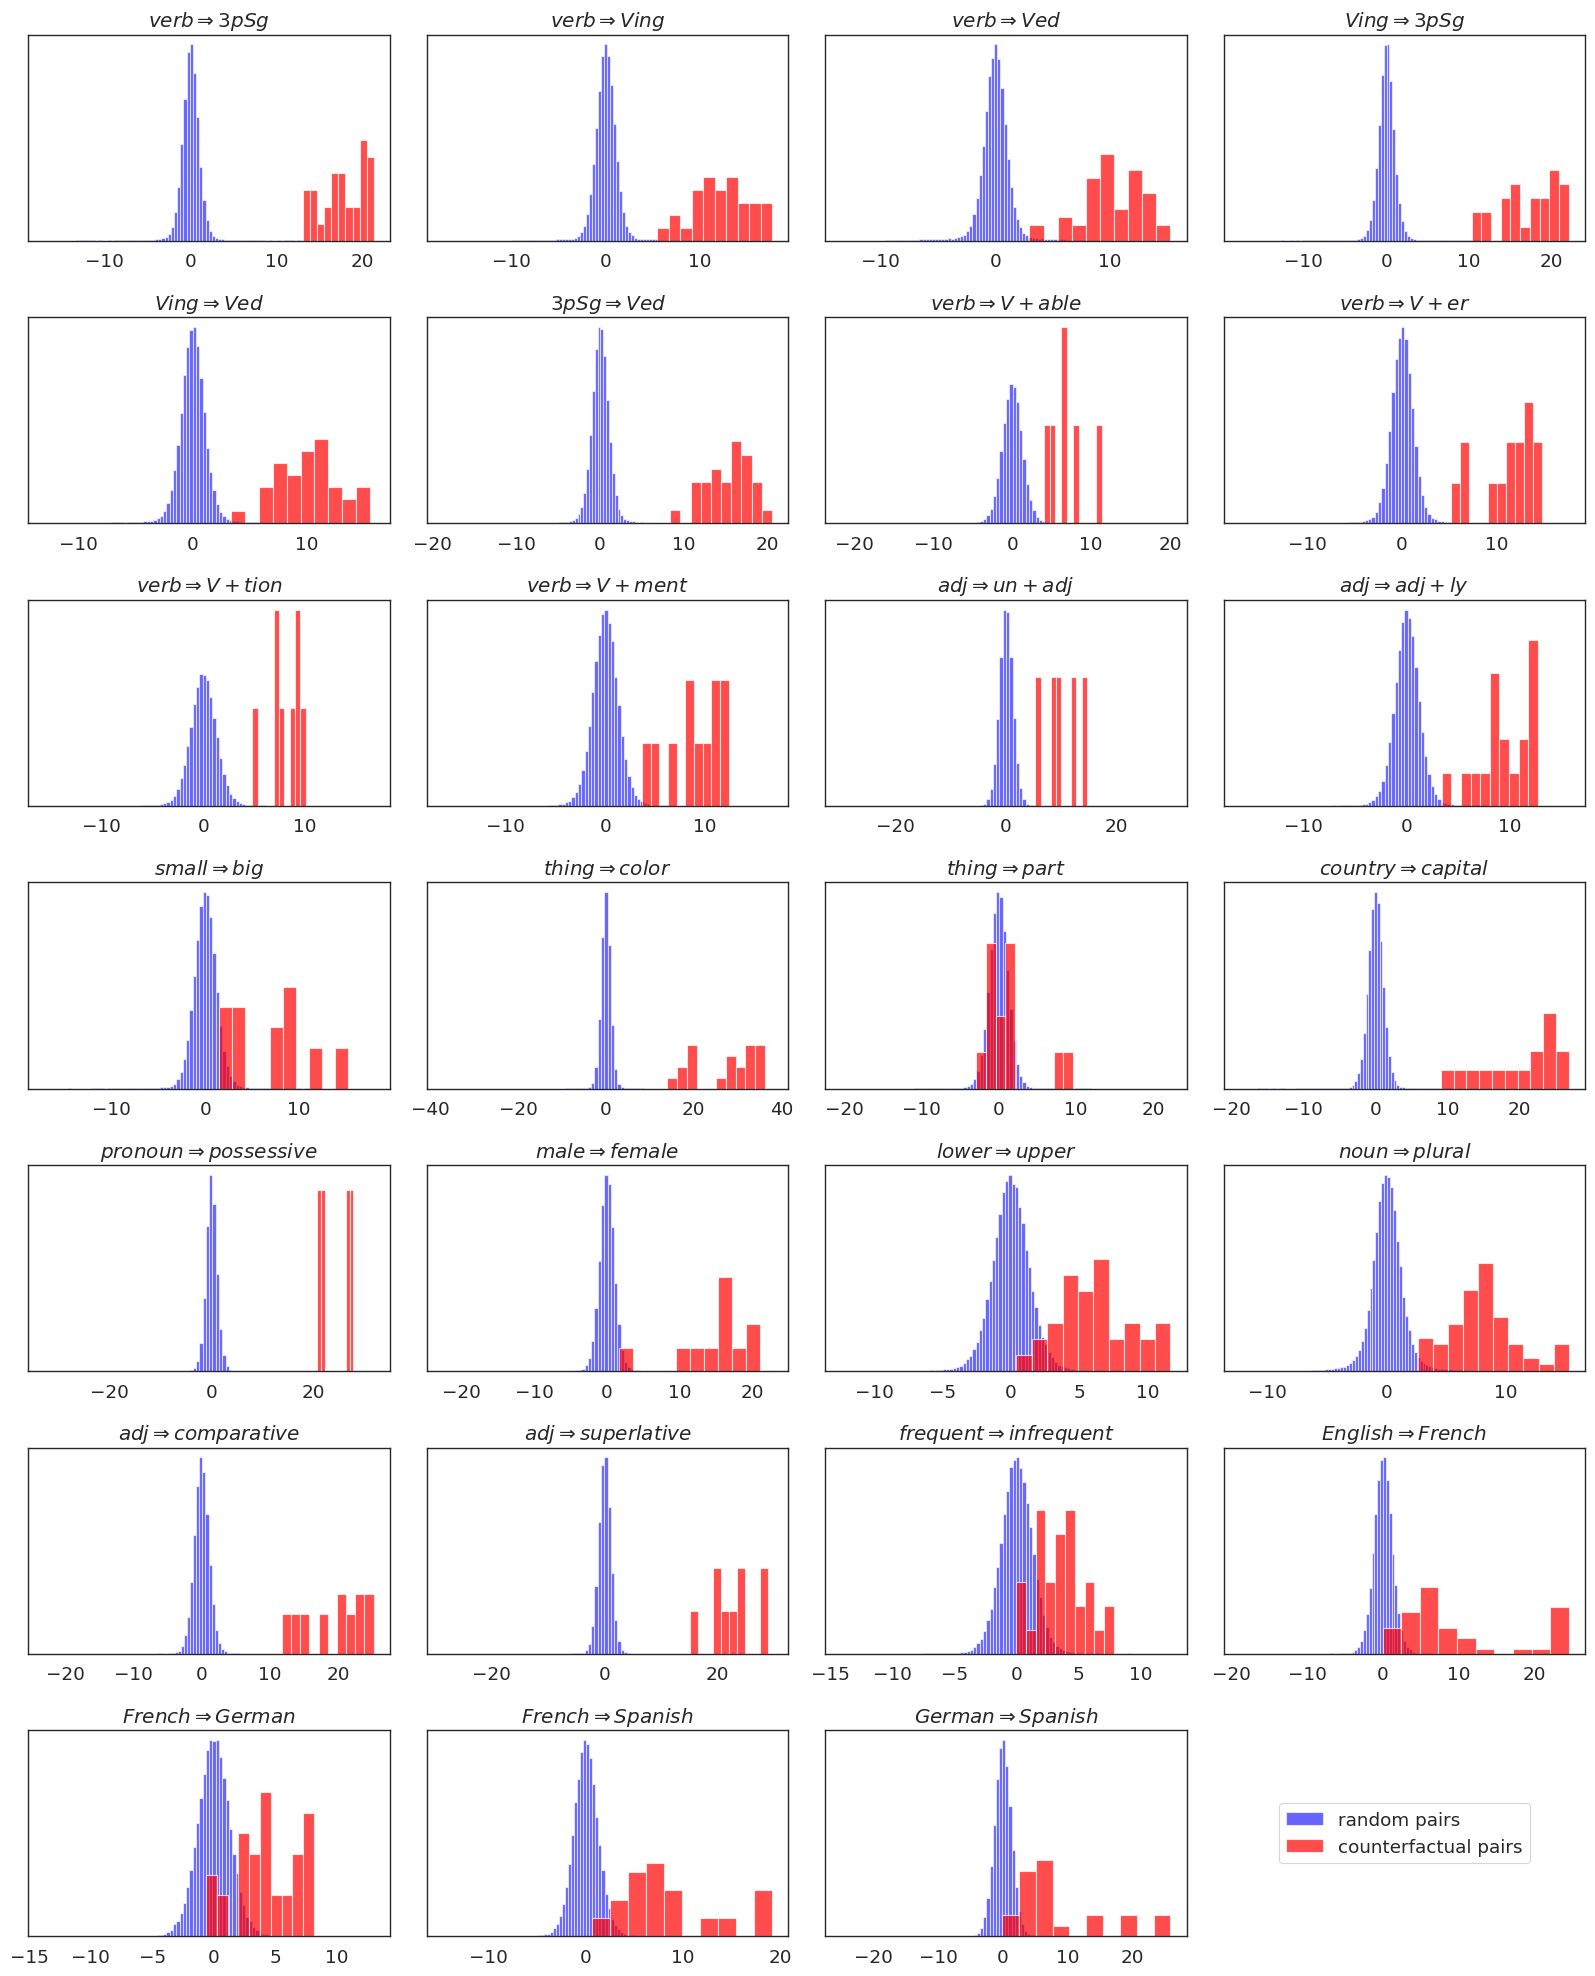

In [4]:
lrg.show_histogram_LOO(inner_product_with_counterfactual_pairs_g_LOO,
                        random_pairs_g, concept_g, concept_names, fig_name = "g")